# Procesamiento de Imágenes en Linux Embebido

<div style="image-align:center"><img src="img/logo_pes.png" width="108"></div>


*Una pequeña introducción a la cuestión*

Ing. David Caruso                  

# Qué es una imágen?

<div style="image-align:center"><img src="img/an_image.png" width="700"></div>

# Qué herramientas vamos a usar?

#### OpenCV (Open Source Computer Vision Library)

<div style="image-align:center"><img src="img/opencv-tools.png" width="700"></div>



# Python

* Lenguaje de programación interpretado de fácil lectura (autodocumentado)
* Código Abierto
* Multiparadigma
    * Funcional
    * Objetos
    * Imperativo
* Comunidad de millones de personas (https://www.python.org/) y comunidad local (http://www.python.org.ar/)


# Comencemos!

Populating the interactive namespace from numpy and matplotlib
900


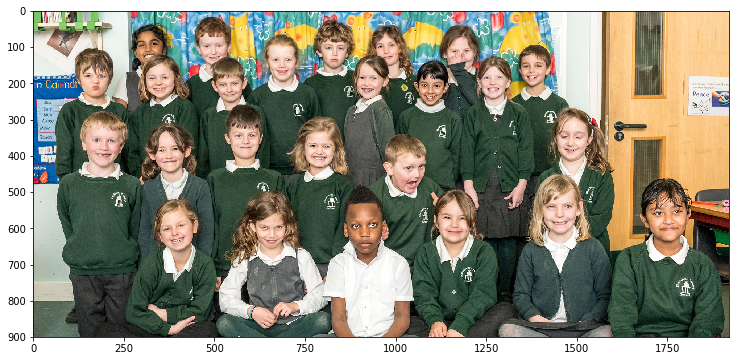

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (30, 6)


img = cv2.imread('img/kids.jpg',1)
img = cv2.cvtColor(img, cv2.cv.CV_BGR2RGB) # Matplotlib espera RGB
plt.imshow(img)
print (len(img))

In [2]:
# Acceso a pixel
px = img [30,180]
print px # B, G, R

[ 65 139  60]


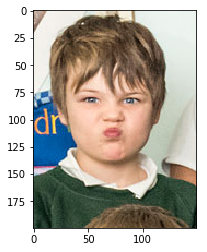

In [3]:
# Acceso a ROI
roi = img[100:300,100:250]
plt.imshow(roi)

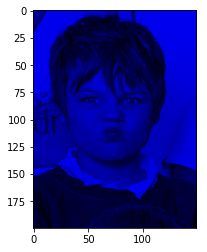

In [4]:
r,g,b = cv2.split(roi)
r[:,:]=0 # Hace 0 todos los pixeles azules
g[:,:]=0 # Hace 0 todos los pixeles verdes
img_r = cv2.merge((r,g,b))
plt.imshow(img_r)

# Aplicación!

Detección de caras de personas

# Haar Cascade (Viola Jones)

### Haar Features

<div style="image-align:center"><img src="img/haarFace.jpg" width="300"></div>



# Haar Cascade

### Cascade Classifiers

<div style="image-align:center"><img src="img/cascade.jpeg" width="300"></div>

*Build a strong classifier with weaks classifiers*


In [12]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

def faces_detection(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.2, 8)
    return faces

faces = faces_detection(img)
print faces[0] # x, y, w, h

[941  71  71  71]


Cantidad de gente=24


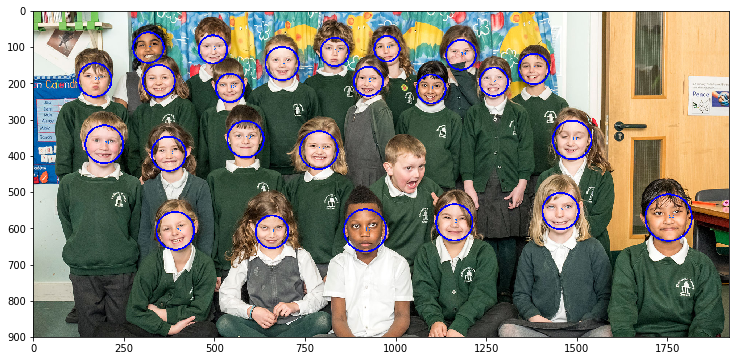

In [13]:
def draw_on_image(frame, coord_list):
    out = frame.copy()
    for i, (x,y,w,h) in enumerate(coord_list):
        cv2.circle(out,(x+w/2,y+h/2), max(w/2,h/2), (0,0,255), 3)
        cv2.putText(out,str(i),(x+w/2,y+h/2),cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,100,255),1)
    return out

plt.imshow(draw_on_image(img, faces))
print ("Cantidad de gente={}".format(len(faces)))

19


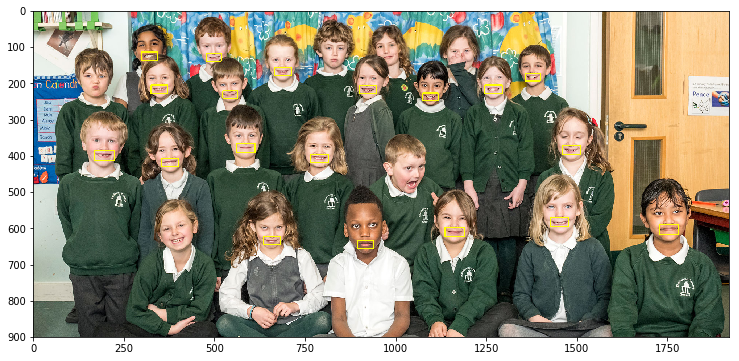

In [42]:
def check_smile(frame, faces):
    out = frame.copy()
    gray = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
    nsmiles = 0
    for i, (x,y,w,h) in enumerate(faces):
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = out[y:y+h, x:x+w]
        smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor= 1.25,minNeighbors=22, maxSize=(70,70))
        if (len(smiles)!=None) and (len(smiles)>0):
            nsmiles+=1
            for (ex,ey,ew,eh) in smiles:
                cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
    return out, nsmiles

out, n= check_smile(img, faces)
plt.imshow(out)
print(n)

# Linux Embebido: 

### Hardware Raspberry Pi 3

<div style="image-align:center"><img src="img/raspberry.png" width="700"></div>

# Setup


<div style="image-align:center"><img src="img/setup.png" width="700"></div>

# DEMO!